In [2]:
import pandas as p
import matplotlib.pyplot as pp

In [3]:
df = p.read_csv('C:/development/datasets/Salaries.csv')
df

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800
...,...,...,...,...,...,...
73,Prof,B,18,10,Female,105450
74,AssocProf,B,19,6,Female,104542
75,Prof,B,17,17,Female,124312
76,Prof,A,28,14,Female,109954


Text(0.5, 1.0, 'Experience distribution for Prof')

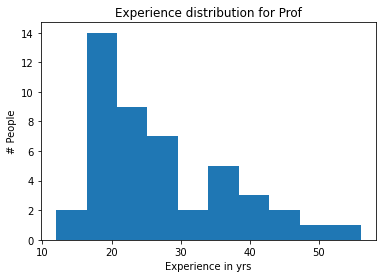

In [4]:
filter = df['rank']=='Prof'
s = df.where(filter, inplace=False)['phd']
pp.hist(s)
pp.xlabel('Experience in yrs')
pp.ylabel('# People')
pp.title('Experience distribution for Prof')


In [5]:
df[:9]

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800
5,Prof,A,20,20,Male,122400
6,AssocProf,A,20,17,Male,81285
7,Prof,A,18,18,Male,126300
8,Prof,A,29,19,Male,94350


In [6]:
df.groupby('rank').count()

,discipline,phd,service,sex,salary
rank,,,,,
AssocProf,13,13,13,13,13
AsstProf,19,19,19,19,19
Prof,46,46,46,46,46


In [7]:
df.groupby('rank')[['salary','phd','rank']].agg(['mean','std','median','min','max'])

salary                                               phd  \
                    mean           std    median    min     max       mean   
rank                                                                         
AssocProf   91786.230769  18571.183714  103613.0  62884  119800  15.076923   
AsstProf    81362.789474   9381.245301   78500.0  63100   97032   5.052632   
Prof       123624.804348  24850.287853  123321.5  57800  186960  27.065217   

                                     
                 std median min max  
rank                                 
AssocProf   5.589597   13.0   9  26  
AsstProf    2.738079    4.0   1  11  
Prof       10.185834   24.5  12  56

<AxesSubplot:xlabel='rank'>

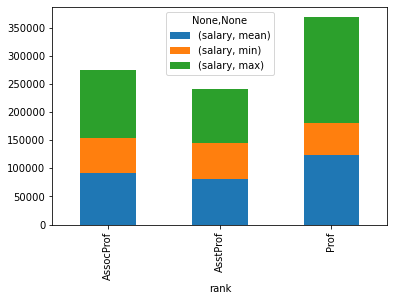

In [8]:
df.groupby('rank')[['salary']].agg(['mean','min','max']).plot(kind='bar', stacked=True)

<AxesSubplot:ylabel='rank'>

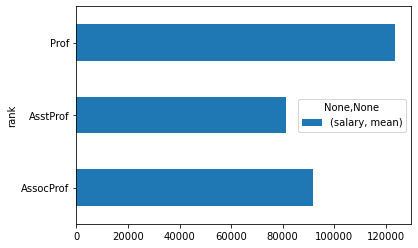

In [9]:
df.groupby('rank')[['salary']].agg(['mean']).plot(kind='barh')

In [10]:
from scipy import stats

In [11]:
stats.norm.cdf(680,loc=711,scale=29)

0.14254260383881612

In [12]:
m = stats.norm.cdf(740,711,29)
n = stats.norm.cdf(697,711,29)
m-n

0.5267111786415019

In [13]:
beml = p.read_csv("C:/development/datasets/BEML.csv")
glaxo = p.read_csv("C:/development/datasets/GLAXO.csv")

In [14]:
beml.head(5)
beml_df = beml[['Date','Close']]

In [15]:
glaxo.head(5)
glaxo_df = glaxo[['Date','Close']]

In [16]:
beml_change = beml_df.Close.pct_change(periods=1)
glaxo_change = glaxo_df.Close.pct_change(periods=1)

In [17]:
import pandas as p
import numpy as npy
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib import pyplot as plt 

In [18]:
mba = p.read_csv("C:/development/datasets/mba.csv")

In [19]:
mba.head(5)


,datasrno,workex,gmat
0,1,21,720
1,2,107,640
2,3,57,740
3,4,99,690
4,5,208,710


<AxesSubplot:>

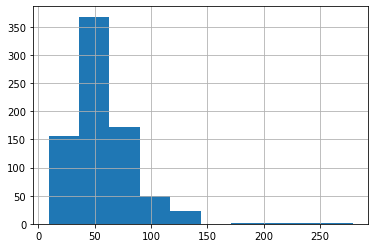

In [20]:
mba['workex'].hist()

<AxesSubplot:>

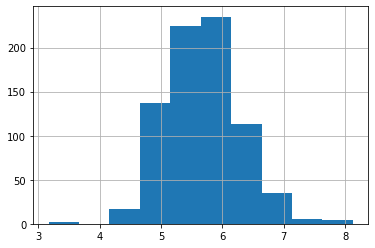

In [21]:
npy.log2(mba['workex']).hist()

<AxesSubplot:>

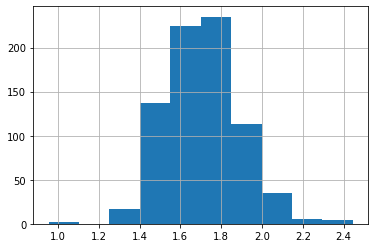

In [22]:
npy.log10(mba['workex']).hist()

<AxesSubplot:>

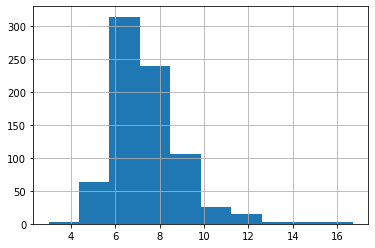

In [23]:
npy.sqrt(mba['workex']).hist()

<AxesSubplot:>

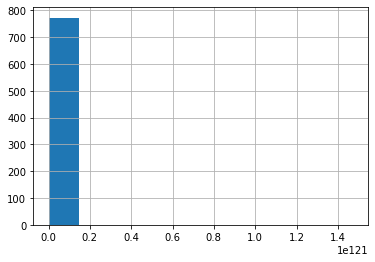

In [24]:
npy.exp(mba['workex']).hist()

In [25]:
mms = MinMaxScaler()
scaled = mms.fit_transform(mba)
type(scaled)
stdscaler = StandardScaler()
new_s = stdscaler.fit_transform(mba)

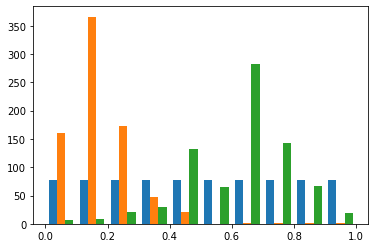

In [26]:
#plt.hist(npy.histogram(scaled))
plt.hist(scaled)
plt.show()

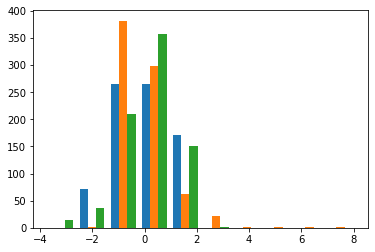

In [27]:
plt.hist(new_s)
plt.show()

In [28]:
from scipy import stats

In [29]:
stats.t.ppf(0.975, df=139)

1.977177724476122

In [30]:
data = {'Candies Count':[1,4,3,5,6,2], 'Probability':[0.015,.2,.65,.005,.01,.120]}
df = p.DataFrame(data)
df

,Candies Count,Probability
0,1,0.015
1,4,0.200
2,3,0.650
3,5,0.005
4,6,0.010
5,2,0.120


In [31]:
df_sort = df.sort_values('Candies Count')
df_sort

,Candies Count,Probability
0,1,0.015
5,2,0.120
2,3,0.650
1,4,0.200
3,5,0.005
4,6,0.010


(array([1., 0., 2., 0., 0., 1., 0., 5., 0., 2.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

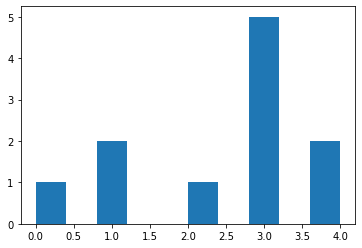

In [32]:
pp.hist([1,2,3,4,3,0,3,3,3,4,1])

In [33]:
t_score = (130-120)/(40/npy.sqrt(80))
t_score

2.23606797749979

In [34]:
1- stats.t.cdf(t_score,df=79)

0.014084316277010789

In [35]:
data = p.Series([0.593, 0.142, 0.329, 0.691, 0.231, 0.793, 0.519, 0.392, 0.418])
data.std()

0.21284390472310402

In [36]:
p_value = stats.ttest_1samp(data,0.3)[1]

In [37]:
p_value = p_value/2
p_value

0.029265164842448826

In [51]:
glaxo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1739 entries, 0 to 1738
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1739 non-null   object 
 1   Close   1739 non-null   float64
dtypes: float64(1), object(1)
memory usage: 27.3+ KB
